In [1]:
!module list

Currently Loaded Modulefiles:
 1) courses/cs435/pa3   3) ide/visual-studio-code  
 2) python/bundle-3.9   4) cuda/11.2               
>

In [1]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
from sklearn.model_selection import StratifiedGroupKFold
import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.models import Sequential
from sklearn.model_selection import GroupKFold, train_test_split

In [3]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


2023-11-16 21:52:54.892886: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-16 21:52:55.246653: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-16 21:52:55.246872: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


In [4]:
shared_dir = "/s/bach/a/class/cs435/cs435a/"
image_dir = "CS435_Plant_Data_v2_augment-v2/2023-11-15-231056"
manifest_path = shared_dir+image_dir+"/manifest_merged_2.csv"
# train_dir = '/s/bach/a/class/cs435/cs435a/CS435_Plant_Data/train'
# val_dir = '/s/bach/a/class/cs435/cs435a/CS435_Plant_Data/valid'
# test_dir = "/s/bach/a/class/cs435/cs435a/CS435_Plant_Data/test"
print(manifest_path)

/s/bach/a/class/cs435/cs435a/CS435_Plant_Data_v2_augment-v2/2023-11-15-231056/manifest_merged_2.csv


In [5]:
manifest_df = pd.read_csv(manifest_path)
# manifest_df

In [6]:
print(manifest_df.columns)
manifest_df

Index(['hdfs_path', 'file_name', 'species', 'is_healthy', 'class_name',
       'source_1', 'source_2', 'tag', 'augmentation', 'correct_file_name',
       'path_to_shared', 'file_exists'],
      dtype='object')


,hdfs_path,file_name,species,is_healthy,class_name,source_1,source_2,tag,augmentation,correct_file_name,path_to_shared,file_exists
0,hdfs:///cs435/term_proj/CS435_Plant_Data_v2/Ap...,00075aa8-d81a-4184-8541-b692b78d398a___FREC_Sc...,Apple,0,Apple___Apple_scab,00075aa8-d81a-4184-8541-b692b78d398a,3335,FREC_Scab,NaN,00075aa8-d81a-4184-8541-b692b78d398a___FREC_Sc...,/s/bach/a/class/cs435/cs435a/CS435_Plant_Data_...,True
1,hdfs:///cs435/term_proj/CS435_Plant_Data_v2/Ap...,00075aa8-d81a-4184-8541-b692b78d398a___FREC_Sc...,Apple,0,Apple___Apple_scab,00075aa8-d81a-4184-8541-b692b78d398a,3335,FREC_Scab,270deg,00075aa8-d81a-4184-8541-b692b78d398a___FREC_Sc...,/s/bach/a/class/cs435/cs435a/CS435_Plant_Data_...,True
2,hdfs:///cs435/term_proj/CS435_Plant_Data_v2/Ap...,00075aa8-d81a-4184-8541-b692b78d398a___FREC_Sc...,Apple,0,Apple___Apple_scab,00075aa8-d81a-4184-8541-b692b78d398a,3335,FREC_Scab,90deg,00075aa8-d81a-4184-8541-b692b78d398a___FREC_Sc...,/s/bach/a/class/cs435/cs435a/CS435_Plant_Data_...,True
3,hdfs:///cs435/term_proj/CS435_Plant_Data_v2/Ap...,00075aa8-d81a-4184-8541-b692b78d398a___FREC_Sc...,Apple,0,Apple___Apple_scab,00075aa8-d81a-4184-8541-b692b78d398a,3335,FREC_Scab,new30degFlipLR,00075aa8-d81a-4184-8541-b692b78d398a___FREC_Sc...,/s/bach/a/class/cs435/cs435a/CS435_Plant_Data_...,True
4,hdfs:///cs435/term_proj/CS435_Plant_Data_v2/Ap...,01a66316-0e98-4d3b-a56f-d78752cd043f___FREC_Sc...,Apple,0,Apple___Apple_scab,01a66316-0e98-4d3b-a56f-d78752cd043f,3003,FREC_Scab,NaN,01a66316-0e98-4d3b-a56f-d78752cd043f___FREC_Sc...,/s/bach/a/class/cs435/cs435a/CS435_Plant_Data_...,True
...,...,...,...,...,...,...,...,...,...,...,...,...
215794,output/CS435_Plant_Data_v2/augment-v2/2023-11-...,fc9299a0-e90c-4ec2-aa08-42dbee742d1b___UF.GRC_...,Tomato,0,Tomato___Tomato_Yellow_Leaf_Curl_Virus,fc9299a0-e90c-4ec2-aa08-42dbee742d1b,03051,UF.GRC_YLCV_Lab,spatter-rain,fc9299a0-e90c-4ec2-aa08-42dbee742d1b___UF.GRC_...,/s/bach/a/class/cs435/cs435a/CS435_Plant_Data_...,True
215795,output/CS435_Plant_Data_v2/augment-v2/2023-11-...,fc970b2a-101f-46d8-ba74-72fc03d0c85c___FREC_Pw...,Cherry_(including_sour),0,Cherry_(including_sour)___Powdery_mildew,fc970b2a-101f-46d8-ba74-72fc03d0c85c,4634,FREC_Pwd.M,spatter-mud,fc970b2a-101f-46d8-ba74-72fc03d0c85c___FREC_Pw...,/s/bach/a/class/cs435/cs435a/CS435_Plant_Data_...,True
215796,output/CS435_Plant_Data_v2/augment-v2/2023-11-...,fc970b2a-101f-46d8-ba74-72fc03d0c85c___FREC_Pw...,Cherry_(including_sour),0,Cherry_(including_sour)___Powdery_mildew,fc970b2a-101f-46d8-ba74-72fc03d0c85c,4634,FREC_Pwd.M,spatter-rain,fc970b2a-101f-46d8-ba74-72fc03d0c85c___FREC_Pw...,/s/bach/a/class/cs435/cs435a/CS435_Plant_Data_...,True
215797,output/CS435_Plant_Data_v2/augment-v2/2023-11-...,fcf78048-c241-4211-b63c-737d5d9f24b9___Keller....,Tomato,0,Tomato___Septoria_leaf_spot,fcf78048-c241-4211-b63c-737d5d9f24b9,1774,Keller.St_CG,spatter-mud,fcf78048-c241-4211-b63c-737d5d9f24b9___Keller....,/s/bach/a/class/cs435/cs435a/CS435_Plant_Data_...,True


In [7]:
# # do split
# from sklearn.model_selection import GroupKFold, train_test_split
# groups = manifest_df['source_1'].unique()
# print(groups.shape)
# train_size = 0.6
# val_size = 0.2

# train_sources, temp_sources = train_test_split(groups, train_size=train_size)
# val_sources, test_sources = train_test_split(temp_sources, test_size=val_size/(val_size + 1 - train_size))

In [ ]:
# print(train_sources.shape[0] /groups.shape[0] * 100)
# print(val_sources.shape[0] /groups.shape[0] * 100)
# print(test_sources.shape[0] /groups.shape[0] * 100)
# #todo check class distributions in splits

In [ ]:
# def get_split(df, sources):
#     return df[df['source_1'].isin(sources)].reset_index(drop=True)

# train_df = get_split(manifest_df, train_sources)
# val_df = get_split(manifest_df, val_sources)
# test_df = get_split(manifest_df, test_sources)


In [8]:
train_df, temp_df = train_test_split(manifest_df, test_size=0.4, random_state=42, stratify=manifest_df['class_name'])
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42, stratify=temp_df['class_name'])
print(train_df.shape)
print(val_df.shape)
print(test_df.shape)

(129479, 12)
(43160, 12)
(43160, 12)


In [9]:
datagen = ImageDataGenerator(rescale=1./255) #normalize from [0,255] to [0,1]


In [31]:
batchsize=128

train_generator = datagen.flow_from_dataframe(
    dataframe=train_df,
    directory=None,
    x_col='path_to_shared',
    y_col='class_name',
    target_size=(224, 224),
    class_mode='categorical',
    batch_size=batchsize
)
val_generator = datagen.flow_from_dataframe(
    dataframe=val_df,
    directory=None,
    x_col='path_to_shared',
    y_col='class_name',
    target_size=(224, 224),
    class_mode='categorical',
    batch_size=batchsize
)
test_generator = datagen.flow_from_dataframe(
    dataframe=test_df,
    directory=None,
    x_col='path_to_shared',
    y_col='class_name',
    target_size=(224, 224),
    class_mode='categorical',
    batch_size=batchsize
)

Found 129479 validated image filenames belonging to 31 classes.
Found 43160 validated image filenames belonging to 31 classes.
Found 43160 validated image filenames belonging to 31 classes.


In [32]:
train_class_dict = train_generator.class_indices
val_class_dict = val_generator.class_indices
test_class_dict = test_generator.class_indices
print(train_class_dict)
print(val_class_dict)
print(test_class_dict)

{'Apple___Apple_scab': 0, 'Apple___Black_rot': 1, 'Apple___Cedar_apple_rust': 2, 'Apple___healthy': 3, 'Cherry_(including_sour)___Powdery_mildew': 4, 'Cherry_(including_sour)___healthy': 5, 'Corn_(maize)___Common_rust_': 6, 'Corn_(maize)___Northern_Leaf_Blight': 7, 'Corn_(maize)___healthy': 8, 'Grape___Black_rot': 9, 'Grape___Esca_(Black_Measles)': 10, 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 11, 'Grape___healthy': 12, 'Peach___Bacterial_spot': 13, 'Peach___healthy': 14, 'Pepper,_bell___Bacterial_spot': 15, 'Pepper,_bell___healthy': 16, 'Potato___Early_blight': 17, 'Potato___Late_blight': 18, 'Potato___healthy': 19, 'Strawberry___Leaf_scorch': 20, 'Strawberry___healthy': 21, 'Tomato___Bacterial_spot': 22, 'Tomato___Early_blight': 23, 'Tomato___Late_blight': 24, 'Tomato___Leaf_Mold': 25, 'Tomato___Septoria_leaf_spot': 26, 'Tomato___Target_Spot': 27, 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 28, 'Tomato___Tomato_mosaic_virus': 29, 'Tomato___healthy': 30}
{'Apple___Apple_scab': 0, 'A

In [ ]:
# pipeline_params = {
#     'labels': 'inferred',
#     'label_mode': 'int',
#     'batch_size': 32,
#     'image_size': (224, 224),
#     'shuffle': True
# }

# train_pipeline = tf.keras.utils.image_dataset_from_directory(
#     f'{train_dir}',
#     **pipeline_params
# )

# valid_pipeline = tf.keras.utils.image_dataset_from_directory(
#     f'{val_dir}',
#     **pipeline_params
# )

# test_pipeline = tf.keras.utils.image_dataset_from_directory(
#     f'{test_dir}',
#     **pipeline_params
# )

In [33]:
base_model=tf.keras.applications.VGG16(weights="imagenet",include_top=False,input_shape=(224,224,3))
base_model.trainable=False

In [34]:
vgg_model=keras.models.Sequential()
vgg_model.add(base_model)
vgg_model.add(Flatten())
vgg_model.add(Dense(4096,activation='relu'))
vgg_model.add(Dense(4096,activation='relu'))
vgg_model.add(Dense(31,activation='softmax'))
vgg_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_3 (Flatten)         (None, 25088)             0         
                                                                 
 dense_9 (Dense)             (None, 4096)              102764544 
                                                                 
 dense_10 (Dense)            (None, 4096)              16781312  
                                                                 
 dense_11 (Dense)            (None, 31)                127007    
                                                                 
Total params: 134,387,551
Trainable params: 119,672,863
Non-trainable params: 14,714,688
_________________________________________________________________


In [35]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
vgg_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                #   loss=SparseCategoricalCrossentropy(from_logits=False),
                  metrics=['accuracy'])

In [36]:
from keras.callbacks import EarlyStopping

earlystopping = EarlyStopping(monitor='val_accuracy',
                              min_delta=.1,
                              patience=3,
                              mode='max',
                              restore_best_weights=True
                              )

In [37]:
model_history = vgg_model.fit(
    train_generator,
#     steps_per_epoch=train_num//batch_size,
    validation_data=val_generator,
    epochs=6,
#     validation_steps=valid_num//batch_size,
    callbacks=[earlystopping]
)

Epoch 1/6
1012/1012 [==============================] - 1100s 1s/step - loss: 0.6661 - accuracy: 0.8451 - val_loss: 0.2707 - val_accuracy: 0.9093
Epoch 2/6
1012/1012 [==============================] - 755s 746ms/step - loss: 0.1642 - accuracy: 0.9437 - val_loss: 0.2500 - val_accuracy: 0.9196
Epoch 3/6
1012/1012 [==============================] - 762s 753ms/step - loss: 0.1200 - accuracy: 0.9589 - val_loss: 0.2153 - val_accuracy: 0.9319
Epoch 4/6
1012/1012 [==============================] - 753s 744ms/step - loss: 0.0900 - accuracy: 0.9694 - val_loss: 0.1393 - val_accuracy: 0.9569


In [38]:
vgg_model.save("trained_model.h5")

In [2]:
from tensorflow.keras.models import load_model
vgg_model = load_model('trained_model.h5')

2023-11-16 23:35:32.538704: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-16 23:35:32.549698: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-16 23:35:32.549955: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-16 23:35:32.550452: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

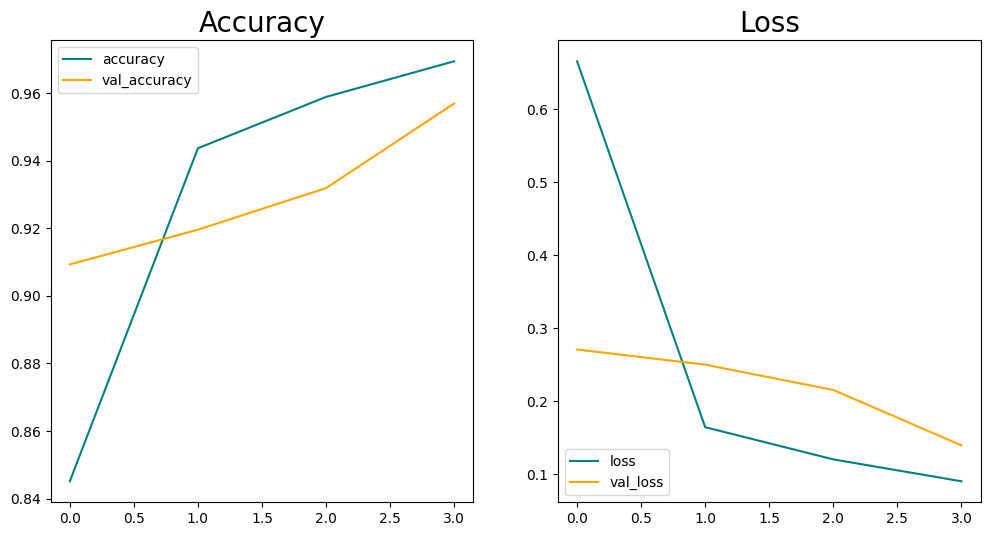

In [39]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
 
plt.subplot(121)
plt.plot(model_history.history['accuracy'], color='teal', label='accuracy')
plt.plot(model_history.history['val_accuracy'], color='orange', label='val_accuracy')
plt.title('Accuracy', fontsize=20)
plt.legend(loc='upper left')
 
plt.subplot(122)
plt.plot(model_history.history['loss'], color='teal', label='loss')
plt.plot(model_history.history['val_loss'], color='orange', label='val_loss')
# plt.yscale('log')
plt.title('Loss', fontsize=20)
plt.legend(loc='lower left')
plt.show()

In [43]:
test_generator = datagen.flow_from_dataframe(
    dataframe=test_df,  # your test dataframe
    x_col='path_to_shared',  # column in dataframe that contains the filenames
    y_col='class_name',      # column in dataframe that contains the labels
    target_size=(224, 224),
    batch_size=1,
    class_mode='categorical',  # or 'binary' if you have binary labels
    shuffle=False
)

Found 43160 validated image filenames belonging to 31 classes.


In [ ]:
predictions = vgg_model.predict(test_generator)

43160/43160 [==============================] - 479s 11ms/step


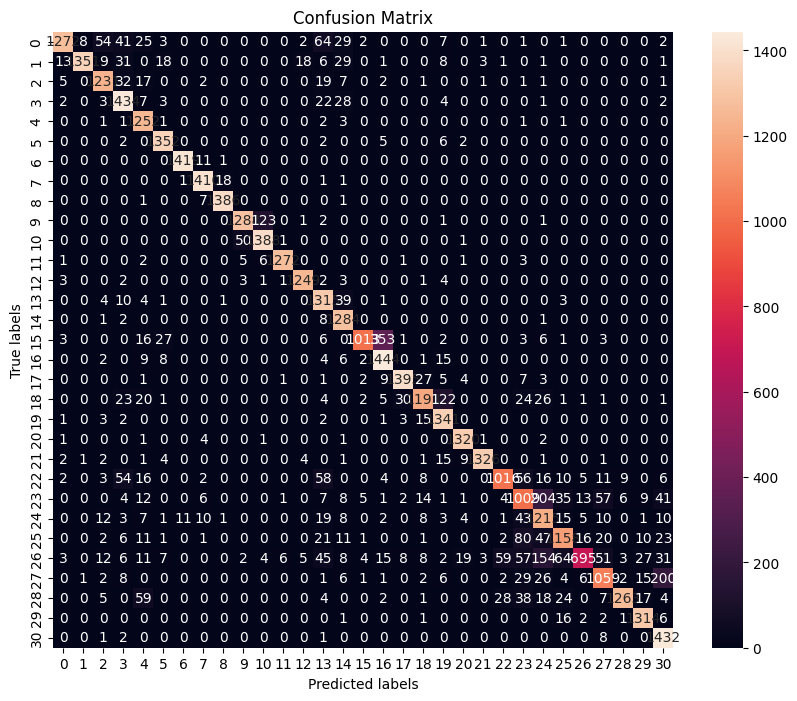

In [44]:

import numpy as np

predicted_classes = np.argmax(predictions, axis=1)

label_map = {label: index for index, label in enumerate(test_generator.class_indices)}

true_classes = test_df['class_name'].map(label_map).values

from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(true_classes, predicted_classes)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
plt.savefig('confusion_matrix.png')


In [40]:
import cv2
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import numpy as np
 
def evaluate_model(model, test_set):
    y_true = []
    y_pred = []
 
    batch_size = 32
    batch_predictions = []
 
    for data, labels in test_set:
        y_true.extend(labels.numpy())
        batch_data = []
 
        for img in data:
            img_np = img.numpy()
            resized_image = cv2.resize(img_np, (224, 224))
            resized_image = resized_image.reshape(1, 224, 224, 3)
            batch_data.append(resized_image)
 
        batch_data = np.vstack(batch_data)
        batch_pred = model.predict(batch_data)
 
        batch_predictions.append(batch_pred)
    y_pred = np.vstack(batch_predictions)
    y_pred_classes = np.argmax(y_pred, axis=1) 
    
    
    precision = precision_score(y_true, y_pred_classes, average="weighted")
    recall = recall_score(y_true, y_pred_classes, average="weighted")
    f1 = f1_score(y_true, y_pred_classes, average="weighted")
    accuracy = accuracy_score(y_true, y_pred_classes)
    return precision, recall, f1, accuracy, np.array(y_true), np.array(y_pred_classes)

In [42]:
precision, recall, f1, acc, y_true, y_pred_classes = evaluate_model(vgg_model, test_generator)

AttributeError: 'numpy.ndarray' object has no attribute 'numpy'

In [ ]:
import pandas as pd
pd.DataFrame([{
    'Rank Precision': f'{precision:.4f}',
    'Rank Recall': f'{recall:.4f}',
    'Rank F1': f'{f1:.4f}',
    'Rank Accuracy': f'{acc:.4f}'
}])

In [ ]:
y_pred_classes

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np # Assuming you have a test dataset called suit_test and labels called suit_test_labelspredictions = suit_model.predict(suit_test) 

class_labels = train_class_dict
# print("Class labels:", class_labels)
cm = confusion_matrix(y_true, y_pred_classes) 
# print("Confusion Matrix:")
# print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=class_labels)

# tick_marks = np.arange(len(class_labels))
# plt.xticks(tick_marks, class_labels, rotation=45)
# plt.yticks(tick_marks, class_labels)
disp.plot()
plt.show()